# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [7]:
from types import SimpleNamespace
import warnings 
import numpy as np
from scipy import optimize
import pandas as pd 
import matplotlib.pyplot as plt
import math

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload 
%autoreload 2

# import inauguralproject
from inauguralproject import HouseholdSpecializationModelClass

# ignore RuntimeWarning
warnings.filterwarnings("ignore", category=RuntimeWarning)

model = HouseholdSpecializationModelClass()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

First, assuming that the choice set is discrete meaning that $L_M, L_F, H_M$ and $H_F$ are available in 
half hours. To illustrate how $H_F/H_M$ changes for varying $\alpha$ and $\sigma$ values we first defines the arrays for the two parameters. We then create three empty lists are created to store the results of the loop. The loop iterates over all possible combinations of $\alpha$ and $\sigma$ values, with the parameters being set to the current values of $\alpha$ and $\sigma$ in each iteration. For the current parameter values the model is solved and the values of $H_F$ and $H_M$ is calculated as the the ratio and stored in the list. DataFrame is used to present results in a table, which can be found below. 

In [8]:
# define alpha and sigma values to vary
alpha_vec = np.linspace(0.25, 0.75, 3)
sigma_vec = np.linspace(0.5, 1.5, 3)

# create empty lists to store results
alpha_list = []
sigma_list = []
HFHM_ratio_list = []

# loop over alpha and sigma values
for alpha in alpha_vec:
    for sigma in sigma_vec:
        # set new alpha and sigma values
        model.par.alpha = alpha
        model.par.sigma = sigma
        # solve model
        opt = model.solve_discrete()
        # store results
        alpha_list.append(alpha)
        sigma_list.append(sigma)
        HFHM_ratio_list.append(opt.HF/opt.HM)

# create table with results
results_df = pd.DataFrame({'alpha': alpha_list,
                           'sigma': sigma_list,
                           'Home production ratio': HFHM_ratio_list})

print(results_df)

   alpha  sigma  Home production ratio
0   0.25    0.5               0.545455
1   0.25    1.0               0.307692
2   0.25    1.5               0.214286
3   0.50    0.5               1.000000
4   0.50    1.0               1.000000
5   0.50    1.5               1.000000
6   0.75    0.5               1.833333
7   0.75    1.0               3.250000
8   0.75    1.5               4.666667


We see from the table that for $\alpha = 0.50$ the ratio equals $1$ as the male and the female is equally productive in home production. An $\alpha$ value closer to $0.00$ indicates that the female specializes more in home production, while the male specializes more in market work. Opposite an $\alpha$ value closer to $1.00$ indicates a female specialization in market work and male specialization in home production. 

$\sigma$ represent the elasticity of substitution such that $\sigma$ equals 1 means that the time and effort for the female and male memeber of the household is perfect substitutes. Meaning that the marginal productivity of one household member's work is constant regardless of the other household member's time allocation. For $\sigma$ less than $1.00$, the household members' time and effort are substitutes, which means that the productivity of one household member's work decreases when the other household member also works. When $\sigma$ is greater than $1.00$, the household members' time and effort are complements, which means that the productivity of one household member's work increases when the other household member also works.

# Question 2

We assume the the values of $\alpha$ and $\sigma$ are back to the baseline values, $\alpha=0.5$ and $\sigma=1.0$. To plot the $log(H_F/H_M)$, first, we defines a range of values of the female wage, $w_f$. As in question $1$ we also creates empty lists for $log(H_F/H_M)$ to store the results later in loop. In each iteration of the loop $w_f$ is set to a current value and the model is solved using the solve_discrete function. The found values are stored in the respective list. 

To plot the results we use Pandas DataFrame and have $log(w_f/w_m)$ on the first axis and $log(H_F/H_M)$ on the second axis. The figure is shown by running the code below. 

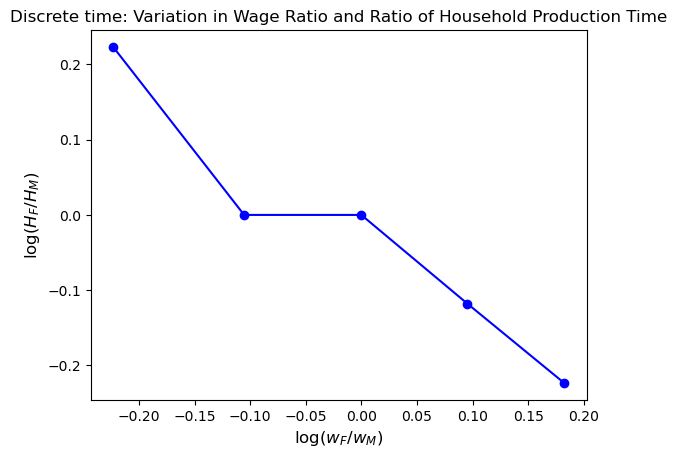

In [9]:
# reset values for alpha and sigma back to initial values
model.par.alpha=0.5
model.par.sigma=1.0

# define wf to vary and create empty lists
wf_vec = np.linspace(0.8, 1.2, 5)
log_wfwm_list = []
log_HFHM_ratio_list = []

# loop over the female wage values
for wf in wf_vec:
    model.par.wF=wf
    opt=model.solve_discrete()
    log_wfwm_list.append(math.log(wf/model.par.wM))
    log_HFHM_ratio_list.append(math.log(opt.HF/opt.HM))

# create figure with results
plt.plot(log_wfwm_list, log_HFHM_ratio_list, marker='o', color='blue')
plt.xlabel('log($w_F$/$w_M$)', fontsize=12)
plt.ylabel('log($H_F$/$H_M$)', fontsize=12)
plt.title('Discrete time: Variation in Wage Ratio and Ratio of Household Production Time', fontsize=12)
plt.show()

The figure shows that the higher value of female wage, the lower value for $log(H_F/H_M)$, meaning the allocation of time changes such the female member works more hours at home than the male household member. When the female wage increases further, the female is better off working in the labour market than home production compared to the male member.

# Question 3

We now assume that the choice set is continous and define a method 'Solve' that solves the model continuously, meaning that it finds the optimal combination of hours worked by each member of the household at any given time. 
First we defines an objective function which takes 4 variables as input, $L_F$, $L_M$, $H_F$ and $H_M$ and then defines constraints, bounds and initial values. 

To solve the model continuously we use the optimization techniques from the 'scipy.optimize' package to find the optimal values of hours. The optimal combination of hours worked that maximizes the utility is found and stored in the opt. namespace.

We use the definition of $w_f$ from question 2 and uses pandas DataFrame to plot $log(H_M/H_F)$ against $log(w_m/w_f)$. By running the code below, you will see the plot. 

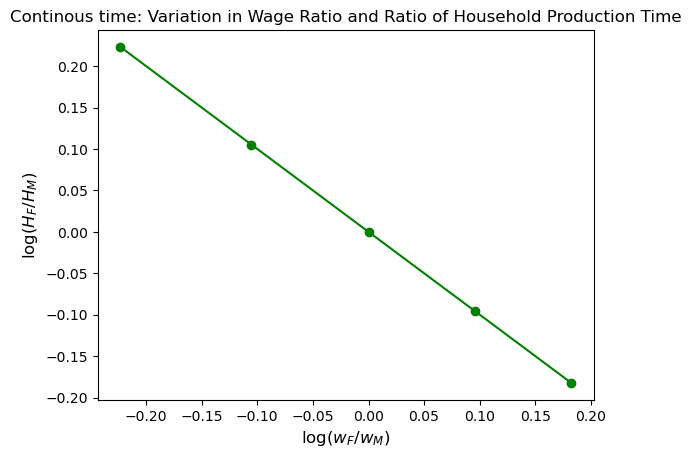

In [10]:
# define wf to vary
log_wfwm_list = []
log_HFHM_ratio_list = []

# loop over the female wage values
for wf in wf_vec:
    model.par.wF=wf
    opt=model.solve()
    log_wfwm_list.append(math.log(wf/model.par.wM))
    log_HFHM_ratio_list.append(math.log(opt.HF/opt.HM))

# create figure with results
plt.plot(log_wfwm_list, log_HFHM_ratio_list, marker='o', color='green')
plt.xlabel('log($w_F$/$w_M$)', fontsize=12)
plt.ylabel('log($H_F$/$H_M$)', fontsize=12)
plt.title('Continous time: Variation in Wage Ratio and Ratio of Household Production Time', fontsize=12)
plt.grid(False)
plt.show()

As in question 2, we see from the figure above that the higher value of the female wage, the lower value of $log(H_F/H_M)$.

# Question 4

To match the data from *Siminski and Yetsenga (2004)* we have to choose values of $\alpha$ and $\sigma$ to minimize

$$
(\beta_0 - \hat\beta_0)^2 + (\beta_1 - \hat\beta_1)^2
$$

To solve the model we use the continuous values for $L_M, L_F, w_M$ and $w_F$. 

First we define a method to estimate the parameters $\alpha$ and $\sigma$ to minimize an objective function. The method solves the model for all $w_f$ values and runs a regression defined in 'run_regression'. Then we defines the objective function to be minimizes, which returns the difference between the target values of $\beta_0$ and $\beta_1$ and the estimated values. Next, we create bounds and initial values which is used to call the optimizer to minimize the objective function using the SLSQP method. Finally, it stores the results in a dictionary and the code below prints them out.

In [ ]:
model.estimate()

By the regression equaltion $log(H_F/H_M) = \beta_0 + \beta_1 * log(w_f/w_m)$ we see that $\beta_0$ is a constant term and $\beta_1$ is the coefficient for the wage ratio for the female and male household member. It means that one percent change in the wage ratio leads to a $\beta_1$ percent change in the ratio of home production. Such the wage ratio increases with one percent, the ratio of home production decreases with 0.8 pct. It indicates that an increase in the ratio of female to male wages, the amount spent on home production by the female decreases. 


We estimate that $\sigma$ equal 1.0 which indicates that the input of home production are perfect substitutes for each other. This means that the production function can easily switch between using the two members without any changes in the level of output. 


As $\sigma$ equal 1.0, we use the Cobb-Douglas roduction function. We estimate $\alpha$ equals 0.8 which means the share of female time in the home production function is relatively high and the home production is more responsive to changes in female labour than male labour. This means that if the female hours working at home increases, the output of home production will increase more than if the share of male labour increases. 

# Question 5

For this question we have to suggest and implement an extension of the model, such we can analyze whether or not it can help match the data when $\alpha = 0.5$.

We start by setting $\alpha$ equals $0.5$ and try to find a $\sigma$ to fit data. The code is quite similar to the one used in question 4 but instead of having both $\alpha$ and $\sigma$ in the objective function, we now only have $\sigma$. The code for this question can be found in the py file under the definition of the method 'estimate_extension'. 

In [ ]:
model.estimate_extension()

We get that for a fixed $\alpha$ equals $0.5$ we estimate $\sigma$ to 2.0. As this extension og the model gives a quite high $\sigma$ value, this does not seem like it is helping matching the data. 